In [1]:

#Data Source and Related Information 
#Online Community Platform: Kaggle
#Webpage Title: Movie Industry 
#Time-Period: 1986-2016
#Link To Dataset: https://www.kaggle.com/datasets/danielgrijalvas/movies

#Defining the Primary Objective for the Project 
#This project aims to determine whether there exists a correlation between a movie's
#production budget and its gross revenue, and, if so, how significant that 
#correlation is. 


# STEP 1: Importing Essential Libraries 
import pandas as pd
import seaborn as sns 
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 
%matplotlib inline 

# STEP 2: Importing The Dataset
df = pd.read_csv(r"C:\Users\shrad\OneDrive\Desktop\movies.csv")


In [43]:

# STEP 3: Visualizing The Dataset

pd.set_option('display.max_rows',None)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [97]:
# STEP 4: Reviewing The Data Types Of Each Column In The Dataset  

df.dtypes


name             int16
rating            int8
genre             int8
year             int64
released         int16
score          float64
votes          float64
director         int16
writer           int16
star             int16
country           int8
budget           int64
gross            int64
company          int16
runtime        float64
yearcorrect       int8
dtype: object

In [57]:

# STEP 5: Checking For Missing Values In The Dataset To Prevent Errors In Future Analysis. 

for col in df.columns:
    percentage_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,percentage_missing))
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.0%
gross - 0.0%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%
yearcorrect - 0.000782472613458529%


In [59]:

#STEP 6: The Key columns, "gross" and "budget" contain missing values (from step-5). To avoid
#analysis errors, it is beneficial to replace these missing values with zero, as both columns 
#are numeric. 

df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')
pd.set_option('display.max_rows',None)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [63]:

#STEP 7: The "released" column currently has the format (date, year, country), but in some cases,
#the year does not align with the "year" column. To address this, we can extract the year from 
#the "released" column and store it in a new column, "yearcorrected". 

df['released'].astype('str') # Converting "released" from data type object to string.  
df['yearcorrect'] = df['released'].str.split().str[2] #Splitting the string to extract year.  
pd.set_option('display.max_rows',None)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [65]:

# STEP 8: The dataset contains duplicate rows that offer no additional value. Removing these
# duplicates will improve accuracy. 

df.drop_duplicates()
pd.set_option('display.max_rows',None)


In [41]:

# STEP 9: With the dataset cleaned, let's sort the data by the "gross" column to view the 
# highest revenue-generating movies before starting our analysis. 

df = df.sort_values(by = ['gross'], inplace = False, ascending = False)
pd.set_option('display.max_rows',None)


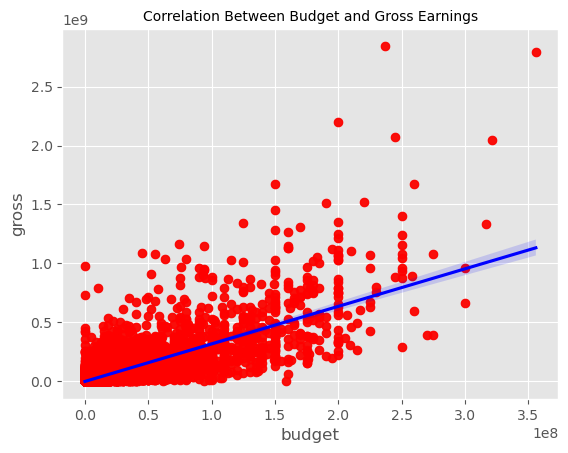

In [67]:

# STEP 10: Plotting "gross" vs. "budget" and performing a regression to examine their 
# correation. 

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Correlation Between Budget and Gross Earnings',fontsize=10)
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
sns.regplot(x='budget',y='gross', data = df,scatter_kws = {"color":"red"}, line_kws={"color":"blue"})
plt.show()

# Initial observations suggest a positive correlation between budget and gross revenue: 
# as the production budget increases, gross revenue tends to rise, and vice versa. However, 
# the strength of this correlation can be better visualized through a correlation matrix. 


             year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000


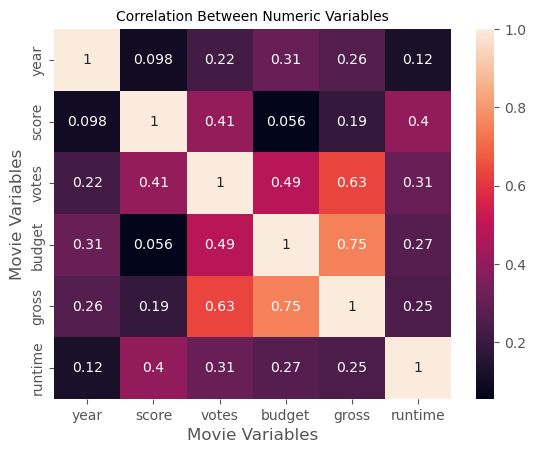

In [71]:

# STEP 11: Building A Correlation Matrix and Visualizing The Matrix. 

df_numeric = df.select_dtypes(include=['number']) 
correlation_matrix = df_numeric.corr(method='pearson') 
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True) #annot provides the values within the boxes
plt.title('Correlation Between Numeric Variables',fontsize =10)
plt.xlabel('Movie Variables')
plt.ylabel('Movie Variables')
plt.show()

# Building on the earlier observation of a positive correlation between production budget
# and gross revenue, we can now state with more precision that the correlation is strong, 
# with a factor of approximately 0.75.


In [75]:

# STEP 11: It would be interesting to explore if other variables, apart from budget,
# have a strong correlation with gross revenue. To achieve this, we first need to 
# convert all non-numeric variables into numeric ones and then generate a correlation 
# matrix for all variables. 

df_numerized = df
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
       df_numerized[col_name] = df_numerized[col_name].astype('category')
       df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()
     

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,31
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,41
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,19
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,37
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,40


                 name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating      -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre        0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year         0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released    -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score        0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes        0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director     0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer       0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star         0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country     -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget       0.020548 -0.081939 -0.334021  0.309212  0.009145  0.055665   
gross        0.006989 -0.

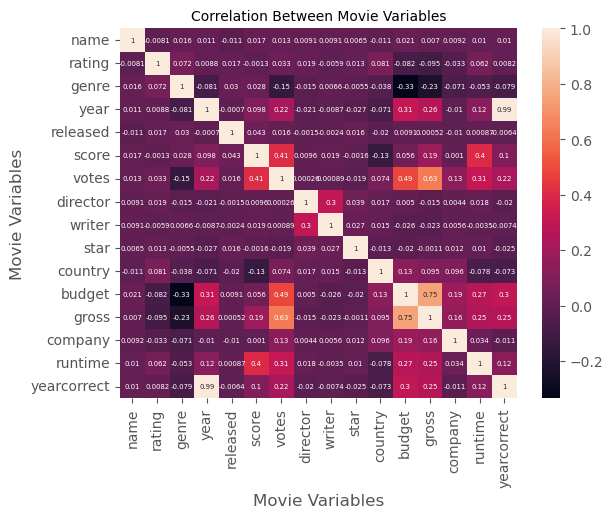

<Figure size 20000x15000 with 0 Axes>

In [79]:

# STEP 12: Building A Correlation Matrix and Visualizing The Matrix.

correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size":5})
plt.xlabel('Movie Variables')
plt.ylabel('Movie Variables')
plt.title('Correlation Between Movie Variables', fontsize = 10)
plt.figure(figsize=(200,150))
print(correlation_matrix)
plt.show()

# In addition to our initial analysis, it's worth noting a moderate correlation of around 
# 0.63 between votes and gross revenue. Higher vote counts, reflecting positive ratings and 
# reviews, may boost viewer interest and drive greater revenue. However, this does not necessarily 
# imply a direct cause-and-effect relationship.


In [83]:

# STEP 13: Creating an alternative visualization method.

data = df_numerized.corr()
corr_pairs = data.unstack()
corr_pairs


name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.010392
             yearcorrect    0.010071
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [87]:

# STEP 14: Sorting the visualization to view highly correlated variables.  

sorted_values = corr_pairs.sort_values(ascending=False)
high_correlation = sorted_values[sorted_values > 0.5]
high_correlation


name         name           1.000000
rating       rating         1.000000
runtime      runtime        1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
yearcorrect  yearcorrect    1.000000
             year           0.990063
year         yearcorrect    0.990063
gross        budget         0.750157
budget       gross          0.750157
votes        gross          0.632834
gross        votes          0.632834
dtype: float64

In [ ]:

# Final Results: 
# We identified a strong positive correlation between movie production budget and revenue, 
# and a moderate positive correlation between votes and gross revenue. Therefore, with 
# reasonable accuracy, we can state that gross revenue tends to rise as the production 
# budget increases, and vice versa. Furthermore, higher votes, reflecting positive ratings 
# and reviews may attract viewers and drive greater revenue. Nonetheless, these 
# observations may not necessarily imply a direct cause-and-effect relationship. 
